# Youtube Comment Sentiment Analysis

## Problem Definiton

To analyze the comments of a youtube video using sentimental anaylsis.

# Data Collection

In [4]:
!pip install youtube_comment_scraper_python

  Using cached youtube-comment-scraper-python-1.0.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached bot_studio-1.4.0.tar.gz (55.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for youtube_comment_scraper_python: filename=youtube_comment_scraper_python-1.0.0-py3-none-any.whl size=2499 sha256=130037890c2eaa0aa7f85f9627818eb2dbfaf82e83c23be99f7f95a1caeb7aba
  Stored in directory: c:\users\kishore\appdata\local\pip\cache\wheels\c0\56\1e\bafd02050bcc1819d4f3088a56f226d298d86994b8da9a18bf
  Created wheel for bot-studio: filename=bot_studio-1.4.0-py3-none-any.whl size=55391288 sha256=267eb23d34750d5f7fd12d6de4ce5b3dec2afb1a929d9fd5eab36e4685cd6b64
  Stored in directory: c:\users\kishore\appdata\local\pip\cache\wheels\0e\dd\e6\f0127210accb9fb316504f091bb1e6a926d69e5c8d89e28523
Successfully built youtube_comment_scraper_python bot-studi


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Import functions for data preprocessing & data preparation
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from string import punctuation
import re

from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
list(swn.senti_synsets('slow'))
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer

In [2]:
from youtube_comment_scraper_python import *
import pandas as pd

link = input("Youtube links: ")
saved = input("Output name: ")
saved = "<DIRECTORY>" + saved + '.csv'

Youtube links: https://www.youtube.com/watch?v=ZWgRvW8d_N4
Output name: video_cmnt


In [3]:
youtube.open(link)

response = youtube.video_comments()
all_data = []
for i in range(0, 3): # It will scroll 10 times
    response = youtube.video_comments()
    data = response['body']
    all_data.extend(data)
df = pd.DataFrame(data)
print(df)

Progress:  46%|███████████████████████████████▉                                     | 92.4/200 [00:14<00:20,  5.27it/s]
Progress:   0%|                                                                                | 0/200 [00:00<?, ?it/s]
Progress:  57%|██████████████████████████████████████▍                             | 113.2/200 [00:24<00:25,  3.36it/s]
Progress:  72%|████████████████████████████████████████████████▉                   | 144.0/200 [00:26<00:11,  5.08it/s]
Progress:  80%|██████████████████████████████████████████████████████▏             | 159.4/200 [00:28<00:07,  5.52it/s]
Progress:  38%|██████████████████████████▌                                          | 77.0/200 [00:10<00:15,  7.99it/s]
Progress:  87%|███████████████████████████████████████████████████████████▍        | 174.8/200 [00:36<00:06,  3.71it/s]

Progress:   0%|                                                                                | 0/200 [00:00<?, ?it/s]

Progress:  90%|███████████████████████

                                             Comment Likes  \
0  This was a great overview Sundas! I'll second ...     0   
1  Thanks dor this video Sundas. I like the rever...     0   
2                      thanks das video was very gut     0   
3  Hey sundas mam, Happy New yearMy query is that...     0   
4  your room looks pretty good. wanna visit there...     0   
5  What is your take on Google's AutoML? It seems...     0   

                 Time user  
0        17 hours ago       
1           1 day ago       
2           1 day ago       
3  1 day ago (edited)       
4           1 day ago       
5         2 hours ago       




Progress: 370.8it [01:25,  2.82it/s]             


Progress:  62%|██████████████████████████████████████████                          | 123.6/200 [00:28<00:30,  2.53it/s]
Progress: 288.40000000000003it [01:07,  2.55it/s]

Progress: 282.4it [00:48,  5.77it/s]
Progress: 447.20000000000005it [01:27,  5.12it/s]



Progress: 100%|████████████████████████████████████████████████████████████████████| 200.0/200 [00:30<00:00,  6.49it/s]

Progress: 364.80000000000007it [01:09,  5.27it/s]


In [4]:
df.to_csv(saved)

In [ ]:
path_txt = saved + ".txt"
file = open(path, 'w')
file.write(df)
file.close()

In [5]:
print(df.columns)

Index(['Comment', 'Likes', 'Time', 'user'], dtype='object')


In [8]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kishore\AppData\Roaming\nltk_data...


True

In [ ]:
path = saved + ".csv"
print(path)

In [4]:
# reading the csv file
data = pd.read_csv("<DIRECTORY>/FILENAME.csv")

# print the column names of the dataset
print(data.columns)

# print top of the data
print(data.head(10))

Index(['Unnamed: 0', 'Comment', 'Likes', 'Time', 'UserLink', 'user'], dtype='object')
   Unnamed: 0                                            Comment  Likes  \
0           0  Check out latest Microsoft BI courses on :http...     20   
1           1  This is for the first time in my life, that so...    253   
2           2  I can't believe how he summed up a whole tutor...     19   
3           3  Can anyone explain how to create options in na...      0   
4           4  The best tutor on utube I ever seen who is jus...      6   
5           5  I love your delivery, straight to the point, v...      1   
6           6  Keep posting such beautiful and crisp videos o...      1   
7           7  Best explanation ever, simple to the point , c...     15   
8           8  Man,,, This is amazing! The way you have expla...      1   
9           9  It was really helpful. Thanks a lot sir, hopin...      2   

                    Time                                           UserLink  \
0        

In [5]:
data = data.drop('UserLink', axis =1)
data = data.drop('user', axis =1)
print(data.head())

   Unnamed: 0                                            Comment  Likes  \
0           0  Check out latest Microsoft BI courses on :http...     20   
1           1  This is for the first time in my life, that so...    253   
2           2  I can't believe how he summed up a whole tutor...     19   
3           3  Can anyone explain how to create options in na...      0   
4           4  The best tutor on utube I ever seen who is jus...      6   

            Time  
0    2 years ago  
1     1 year ago  
2   8 months ago  
3   21 hours ago  
4  11 months ago  


In [30]:
data.dtypes

Unnamed: 0                  int64
Comment                    object
Likes                       int64
Time                       object
comment_text               object
Positive                  float64
Negative                  float64
Neutral                   float64
Compound                  float64
Sentiment                  object
Sentiwordnet_analyse      float64
Sentiment_sentiwordnet     object
dtype: object

In [6]:
data.count()

Unnamed: 0    60
Comment       60
Likes         60
Time          60
dtype: int64

In [7]:
data.dtypes

Unnamed: 0     int64
Comment       object
Likes          int64
Time          object
dtype: object

In [8]:
data["comment_text"] = data["Comment"].copy()

In [9]:
print(data.columns)

Index(['Unnamed: 0', 'Comment', 'Likes', 'Time', 'comment_text'], dtype='object')


In [11]:
print(data.head(5))

   Unnamed: 0                                            Comment  Likes  \
0           0  Check out latest Microsoft BI courses on :http...     20   
1           1  This is for the first time in my life, that so...    253   
2           2  I can't believe how he summed up a whole tutor...     19   
3           3  Can anyone explain how to create options in na...      0   
4           4  The best tutor on utube I ever seen who is jus...      6   

            Time                                       comment_text  
0    2 years ago  Check out latest Microsoft BI courses on :http...  
1     1 year ago  This is for the first time in my life, that so...  
2   8 months ago  I can't believe how he summed up a whole tutor...  
3   21 hours ago  Can anyone explain how to create options in na...  
4  11 months ago  The best tutor on utube I ever seen who is jus...  


In [10]:
stop_words = stopwords.words('english')

In [11]:
def text_processing(text):   
    # convert text into lowercase
    text = text.lower()
    
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','', text)

    # remove new line characters in text
    text = re.sub(r'\n',' ', text)
    
    # remove punctuations from text
    text = re.sub('[%s]' % re.escape(punctuation), "", text)
    
    # remove references and hashtags from text
    text = re.sub("^a-zA-Z0-9$,.", "", text)
    
    # remove multiple spaces from text
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    # remove special characters from text
    text = re.sub(r'\W', ' ', text)
    

    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])
    
    # stemming using porter stemmer from nltk package - msh a7sn 7aga - momken: lancaster, snowball
    # text=' '.join([porter_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([lancaster_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([snowball_stemer.stem(word) for word in word_tokenize(text)])
    

    return text


In [12]:
for i in range(0,len(data)):
#     data["comment"] = [text_processing(i)["comment_text"] for i in data['comment_text']]
    data["comment_text"][i] = text_processing(data['comment_text'][i])

<ipython-input-12-56165e858764>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["comment_text"][i] = text_processing(data['comment_text'][i])


In [15]:
print(data.head(5))

   Unnamed: 0                                            Comment  Likes  \
0           0  Check out latest Microsoft BI courses on :http...     20   
1           1  This is for the first time in my life, that so...    253   
2           2  I can't believe how he summed up a whole tutor...     19   
3           3  Can anyone explain how to create options in na...      0   
4           4  The best tutor on utube I ever seen who is jus...      6   

            Time                                       comment_text  
0    2 years ago  check latest microsoft bi courses coupon youtu...  
1     1 year ago  first time life someone promised teach amazing...  
2   8 months ago  cant believe summed whole tutorial 5 mins amaz...  
3   21 hours ago  anyone explain create options navigator select...  
4  11 months ago  best tutor utube ever seen point clear love wa...  


In [21]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data['Comment']]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data['Comment']]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data['Comment']]
data['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data['Comment']]
score = data["Compound"].values
sentiment = []
for i in score:
    if i > 0.03:
        sentiment.append('Positive')
        
    elif i < -0.03:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data["Sentiment"] = sentiment
data.head()

,Unnamed: 0,Comment,Likes,Time,comment_text,Positive,Negative,Neutral,Compound,Sentiment,Sentiwordnet_analyse
0,0,Check out latest Microsoft BI courses on :http...,20,2 years ago,check latest microsoft bi courses coupon youtu...,0.000,0.0,1.000,0.0000,Neutral,0.125
1,1,"This is for the first time in my life, that so...",253,1 year ago,first time life someone promised teach amazing...,0.313,0.0,0.687,0.9060,Positive,0.750
2,2,I can't believe how he summed up a whole tutor...,19,8 months ago,cant believe summed whole tutorial 5 mins amaz...,0.252,0.0,0.748,0.7955,Positive,0.375
3,3,Can anyone explain how to create options in na...,0,21 hours ago,anyone explain create options navigator select...,0.149,0.0,0.851,0.3527,Positive,-0.250
4,4,The best tutor on utube I ever seen who is jus...,6,11 months ago,best tutor utube ever seen point clear love wa...,0.324,0.0,0.676,0.9001,Positive,1.250


In [18]:
def sentiwordnet_analysis(text):
    sentence= text
    token = nltk.word_tokenize(sentence)
    after_tagging = nltk.pos_tag(token)
#     print (token)
#     print (after_tagging)
    def penn_to_wn(tag):
        if tag.startswith('J'):
            return wn.ADJ
        elif tag.startswith('N'):
            return wn.NOUN
        elif tag.startswith('R'):
            return wn.ADV
        elif tag.startswith('V'):
            return wn.VERB
        return None
    sentiment = 0.0
    tokens_count = 0
    lemmatizer = WordNetLemmatizer()
    for word, tag in after_tagging:
                wn_tag = penn_to_wn(tag)
                if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                    continue

                lemma = lemmatizer.lemmatize(word, pos=wn_tag)
                if not lemma:
                    continue

                synsets = wn.synsets(lemma, pos=wn_tag)
                if not synsets:
                    continue

                # Take the first sense, the most common
                synset = synsets[0]
                swn_synset = swn.senti_synset(synset.name())
#                 print(swn_synset)
#                 print('\n')

                sentiment += swn_synset.pos_score() - swn_synset.neg_score()
                tokens_count += 1
    return sentiment

In [19]:
data['Sentiwordnet_analyse'] = [sentiwordnet_analysis(i) for i in data['Comment']]

In [22]:
score = data["Sentiwordnet_analyse"].values
sentiment = []
for i in score:
    if i > 0.3:
        sentiment.append('Positive')
        
    elif i < -0.3:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data["Sentiment_sentiwordnet"] = sentiment

In [20]:
data.columns

Index(['Unnamed: 0', 'Comment', 'Likes', 'Time', 'comment_text', 'Positive',
       'Negative', 'Neutral', 'Compound', 'Sentiment', 'Sentiwordnet_analyse',
       'Sentiment_sentiwordnet'],
      dtype='object')

In [26]:
data

,Unnamed: 0,Comment,Likes,Time,comment_text,Positive,Negative,Neutral,Compound,Sentiment,Sentiwordnet_analyse,Sentiment_sentiwordnet
0,0,Check out latest Microsoft BI courses on :http...,20,2 years ago,check latest microsoft bi courses coupon youtu...,0.000,0.000,1.000,0.0000,Neutral,0.125,Neutral
1,1,"This is for the first time in my life, that so...",253,1 year ago,first time life someone promised teach amazing...,0.313,0.000,0.687,0.9060,Positive,0.750,Positive
2,2,I can't believe how he summed up a whole tutor...,19,8 months ago,cant believe summed whole tutorial 5 mins amaz...,0.252,0.000,0.748,0.7955,Positive,0.375,Positive
3,3,Can anyone explain how to create options in na...,0,21 hours ago,anyone explain create options navigator select...,0.149,0.000,0.851,0.3527,Positive,-0.250,Neutral
4,4,The best tutor on utube I ever seen who is jus...,6,11 months ago,best tutor utube ever seen point clear love wa...,0.324,0.000,0.676,0.9001,Positive,1.250,Positive
5,5,"I love your delivery, straight to the point, v...",1,4 months ago (edited),love delivery straight point clear simple than...,0.541,0.000,0.459,0.8953,Positive,0.250,Neutral
6,6,Keep posting such beautiful and crisp videos o...,1,4 months ago,keep posting beautiful crisp videos power bi s...,0.329,0.000,0.671,0.9049,Positive,0.750,Positive
7,7,"Best explanation ever, simple to the point , c...",15,1 year ago (edited),best explanation ever simple point clear perfe...,0.490,0.000,0.510,0.9689,Positive,2.125,Positive
8,8,"Man,,, This is amazing! The way you have expla...",1,2 months ago,man amazing way explained really great definit...,0.382,0.000,0.618,0.9145,Positive,1.125,Positive
9,9,"It was really helpful. Thanks a lot sir, hopin...",2,1 year ago,really helpful thanks lot sir hoping videos be...,0.460,0.000,0.540,0.8771,Positive,0.500,Positive


In [25]:
data.to_csv('comment_analysed.csv')

In [23]:
count_df = data['Sentiment'].value_counts()
count_index = count_df.index
count_values = count_df.values
print(count_index, count_values)

Index(['Positive', 'Neutral'], dtype='object') [58  2]


In [24]:
count_list = count_df.values.tolist()
count_list

[58, 2]

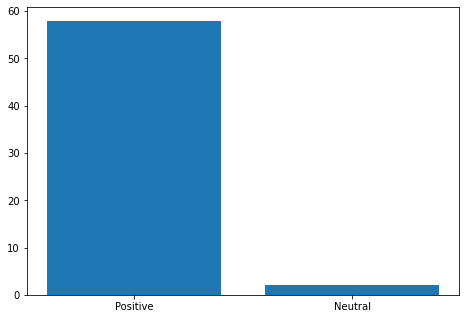

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(count_index,count_values)
plt.show()

In [27]:
count_df = data['Sentiment_sentiwordnet'].value_counts()
count_index = count_df.index
count_values = count_df.values
print(count_index, count_values)

Index(['Positive', 'Neutral', 'Negative'], dtype='object') [37 22  1]


In [28]:
count_list = count_df.values.tolist()
count_list

[37, 22, 1]

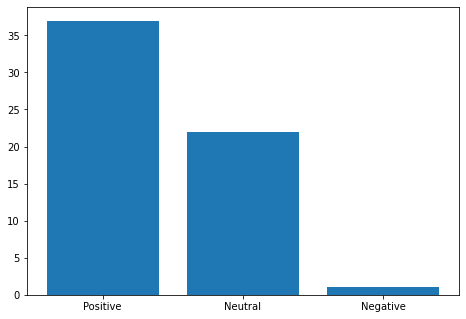

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(count_index,count_values)
plt.show()

In [42]:
top_positive = data.sort_values(by = 'Compound', ascending =False)
top_positive['Comment'].head(4).to_list()

['Best explanation ever, simple to the point , clear and perfect touch screen. I am so glad i found you . Keep it up with your effective excellent tutorials. You are gifted.',
 'very precise explanation, very easy to understand and these short training clips are easier to grasp. thanks so much for this great video',
 'Outstanding!  Your tutorials are so clear and concise. Thank you.  I will become a student of your YouTube channel!  Thank you!',
 'What if you have a list of inoperative units and you want to display the reports on their service? How could you do that in Power BI? Please help! :-) And thank you for the video, it was really helpful!']

In [41]:
top_positive = data.sort_values(by = 'Sentiment_sentiwordnet', ascending =False)
top_positive['Comment'].head(4).to_list()

['What if you have a list of inoperative units and you want to display the reports on their service? How could you do that in Power BI? Please help! :-) And thank you for the video, it was really helpful!',
 'This series is awesome to learn Power BI quickly.. Thanks a lot',
 "I'm not sure of the best way to Salute you but brother explanations are on point. A salute to you  for your channel.",
 'Very informative video sir thank you so much ️ easier than I thought credit goes to you.']

In [3]:
!pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from textblob import TextBlob

In [52]:
data['textblob_cmnt'] = TextBlob(str(data['Comment']))

ValueError: Length of values (3388) does not match length of index (60)

In [42]:
type(text)

textblob.blob.TextBlob

In [43]:
text.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [44]:
text.sentiment.polarity

0.0